In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\Farhan Ramadhan\AppData\Local\Temp\ipykernel_15336\20224452.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [7]:
# Load data
def load_data(folder_path):
    """Load all CSV files from a folder into a dictionary of dataframes"""
    data_dict = {}
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            symbol = file.split('_')[0]
            df = pd.read_csv(os.path.join(folder_path, file))
            data_dict[symbol] = df
    return data_dict

# Load stock and crypto data
stocks = load_data('data/stocks')
crypto = load_data('data/crypto')

In [8]:
# Basic preprocessing function
def preprocess_data(df):
    """Basic preprocessing steps"""
    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set Date as index
    df.set_index('Date', inplace=True)
    
    # Convert price columns to numeric, removing any currency symbols and commas
    numeric_columns = ['Close', 'High', 'Low']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')
    
    # Handle missing values
    df.fillna(method='ffill', inplace=True)
    
    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Calculate volatility (20-day rolling standard deviation)
    df['Volatility'] = df['Daily_Return'].rolling(window=20).std()
    
    # Add technical indicators
    # Simple Moving Averages
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    
    return df

# Apply preprocessing to all datasets
for symbol in stocks:
    stocks[symbol] = preprocess_data(stocks[symbol])
for symbol in crypto:
    crypto[symbol] = preprocess_data(crypto[symbol])

C:\Users\Farhan Ramadhan\AppData\Local\Temp\ipykernel_15336\1412635394.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Farhan Ramadhan\AppData\Local\Temp\ipykernel_15336\1412635394.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Farhan Ramadhan\AppData\Local\Temp\ipykernel_15336\1412635394.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Farhan Ramadhan\AppData\Local\Temp\ipykernel_15336\1412635394.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method

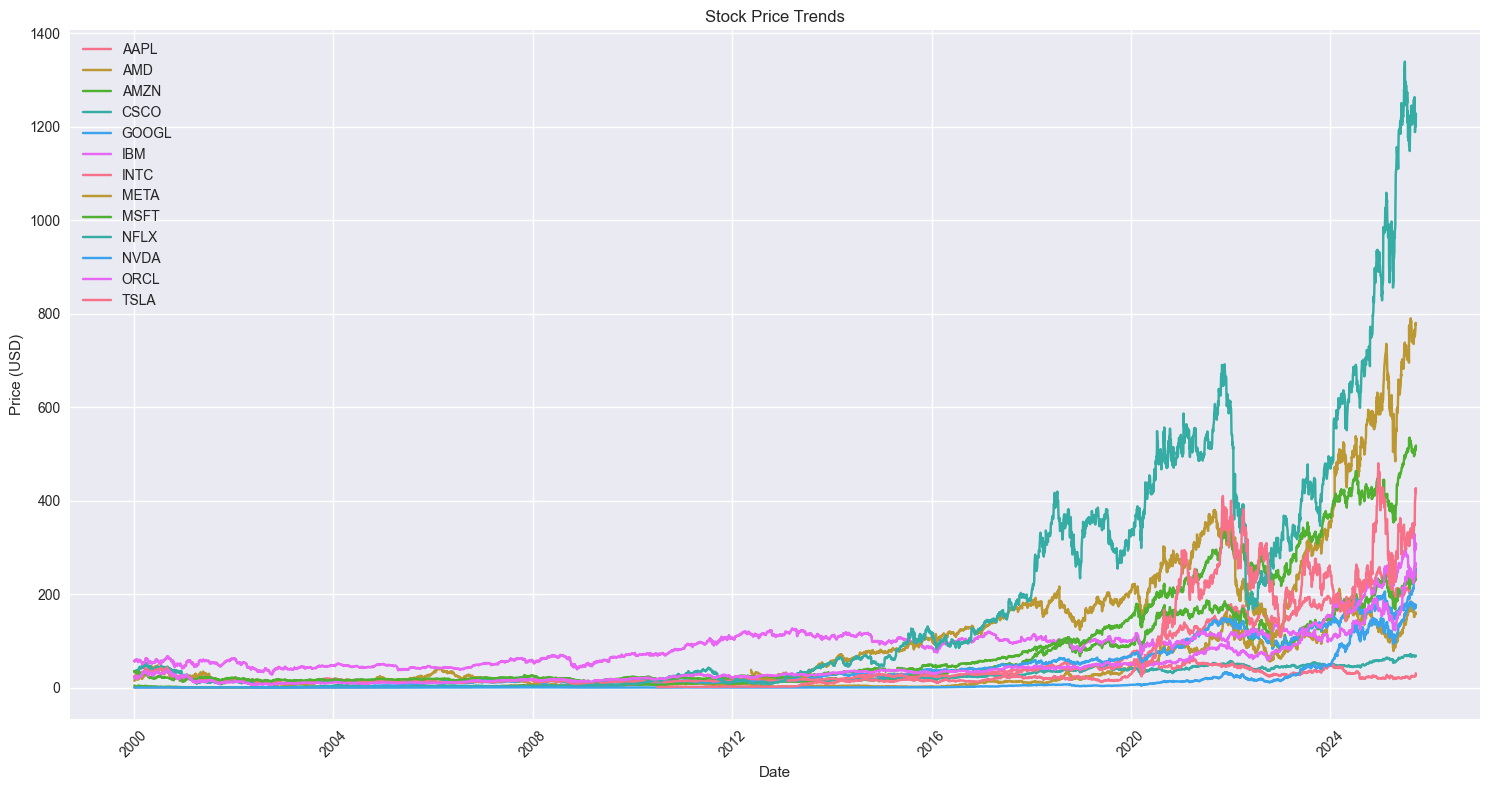

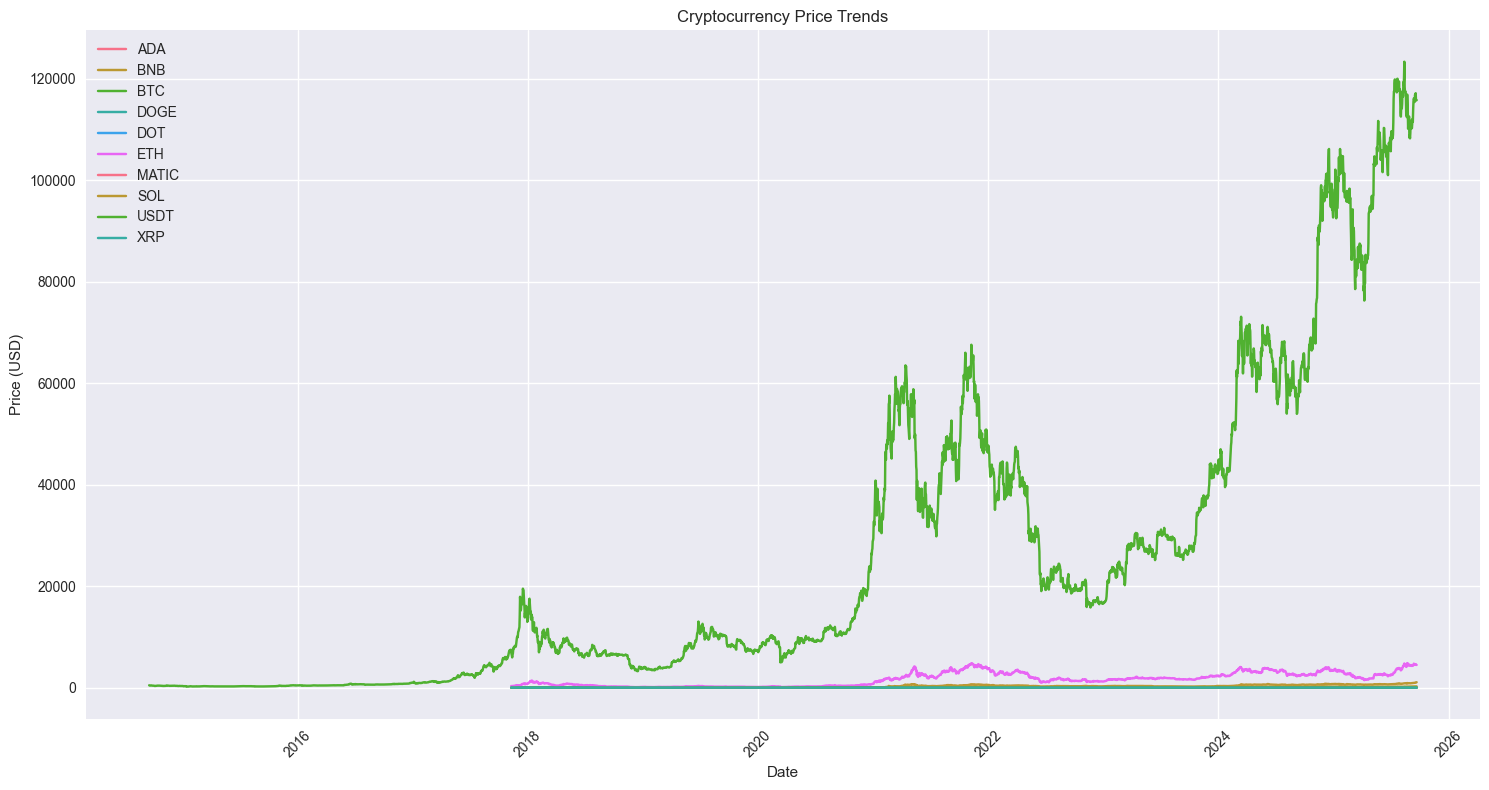

In [9]:
# Explanatory Data Analysis (EDA)
# 1. Price Trends
def plot_price_trends(data_dict, title_prefix):
    plt.figure(figsize=(15, 8))
    for symbol in data_dict:
        plt.plot(data_dict[symbol].index, data_dict[symbol]['Close'], label=symbol)
    plt.title(f'{title_prefix} Price Trends')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot price trends for stocks and crypto
plot_price_trends(stocks, 'Stock')
plot_price_trends(crypto, 'Cryptocurrency')

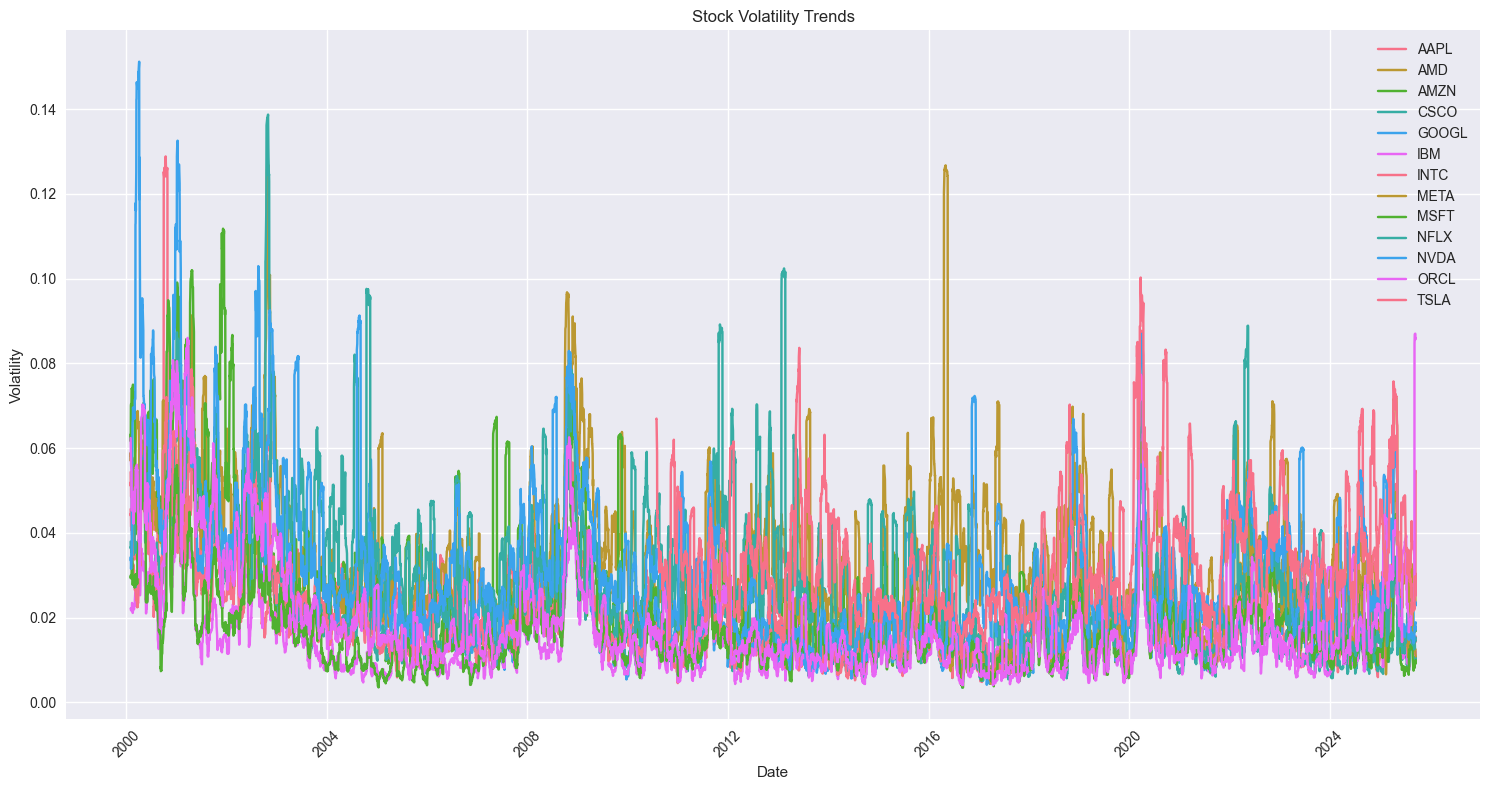

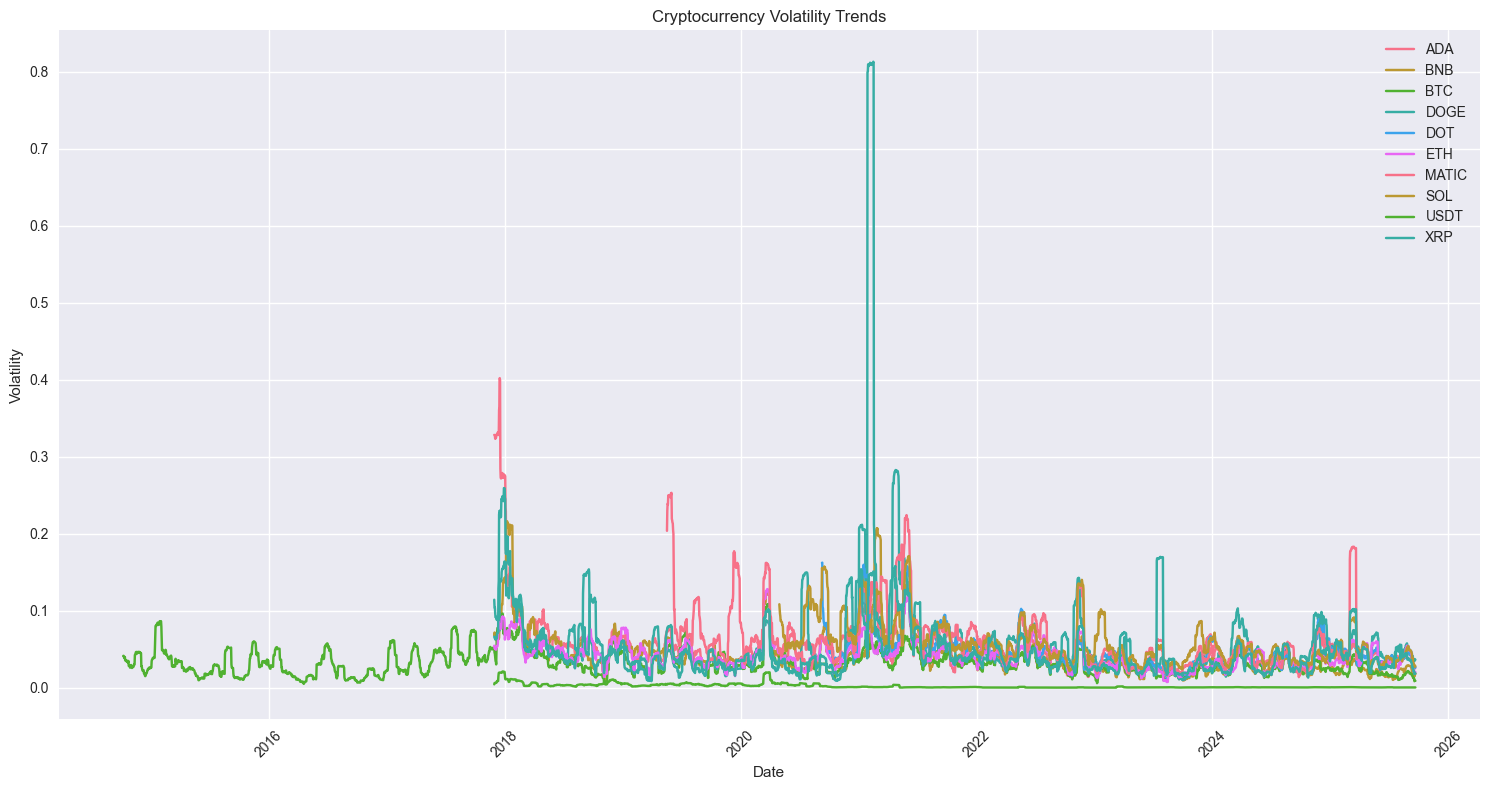

In [10]:
# 2. Volatility Analysis
def plot_volatility(data_dict, title_prefix):
    plt.figure(figsize=(15, 8))
    for symbol in data_dict:
        plt.plot(data_dict[symbol].index, data_dict[symbol]['Volatility'], label=symbol)
    plt.title(f'{title_prefix} Volatility Trends')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot volatility for stocks and crypto
plot_volatility(stocks, 'Stock')
plot_volatility(crypto, 'Cryptocurrency')

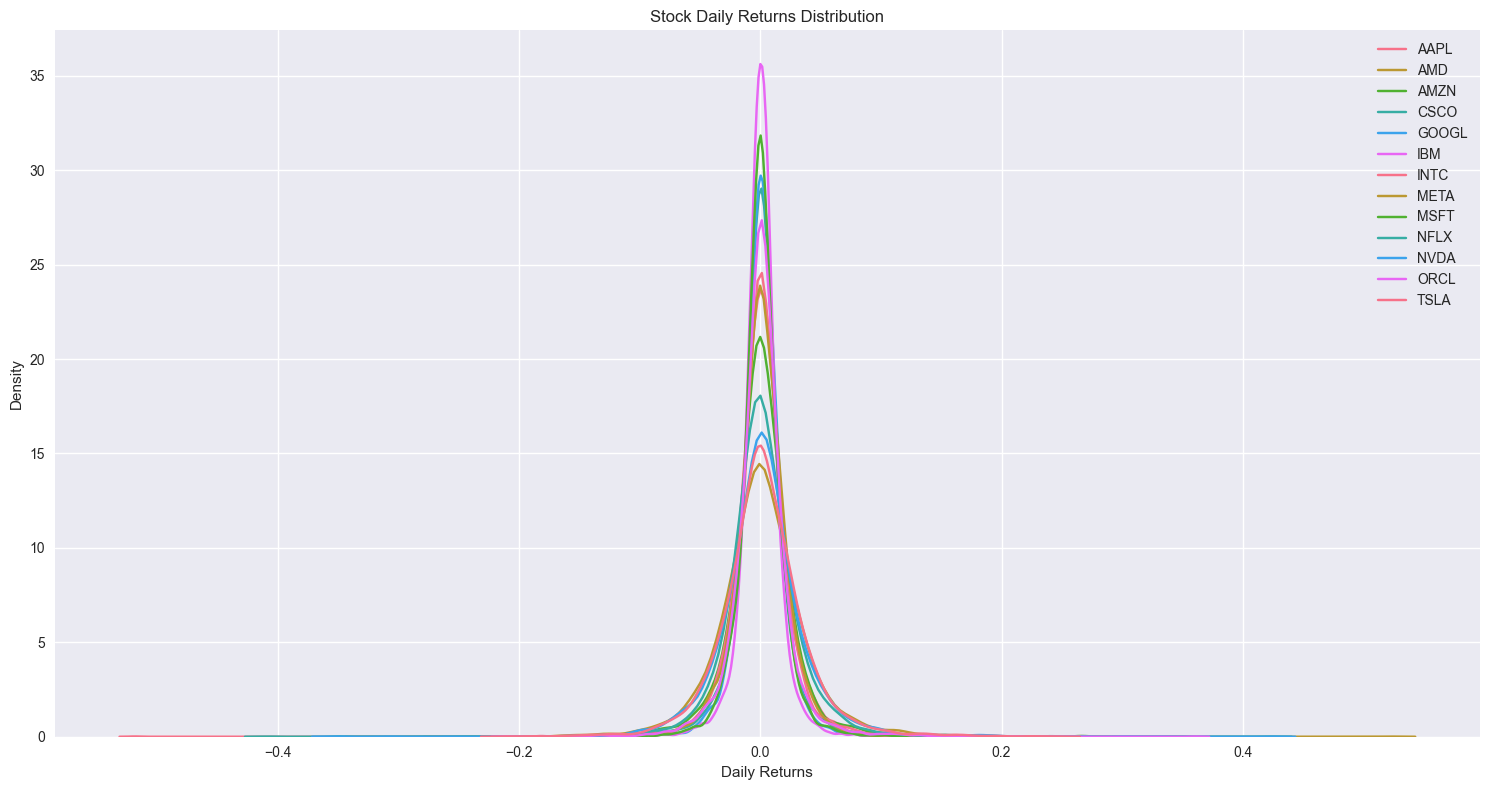

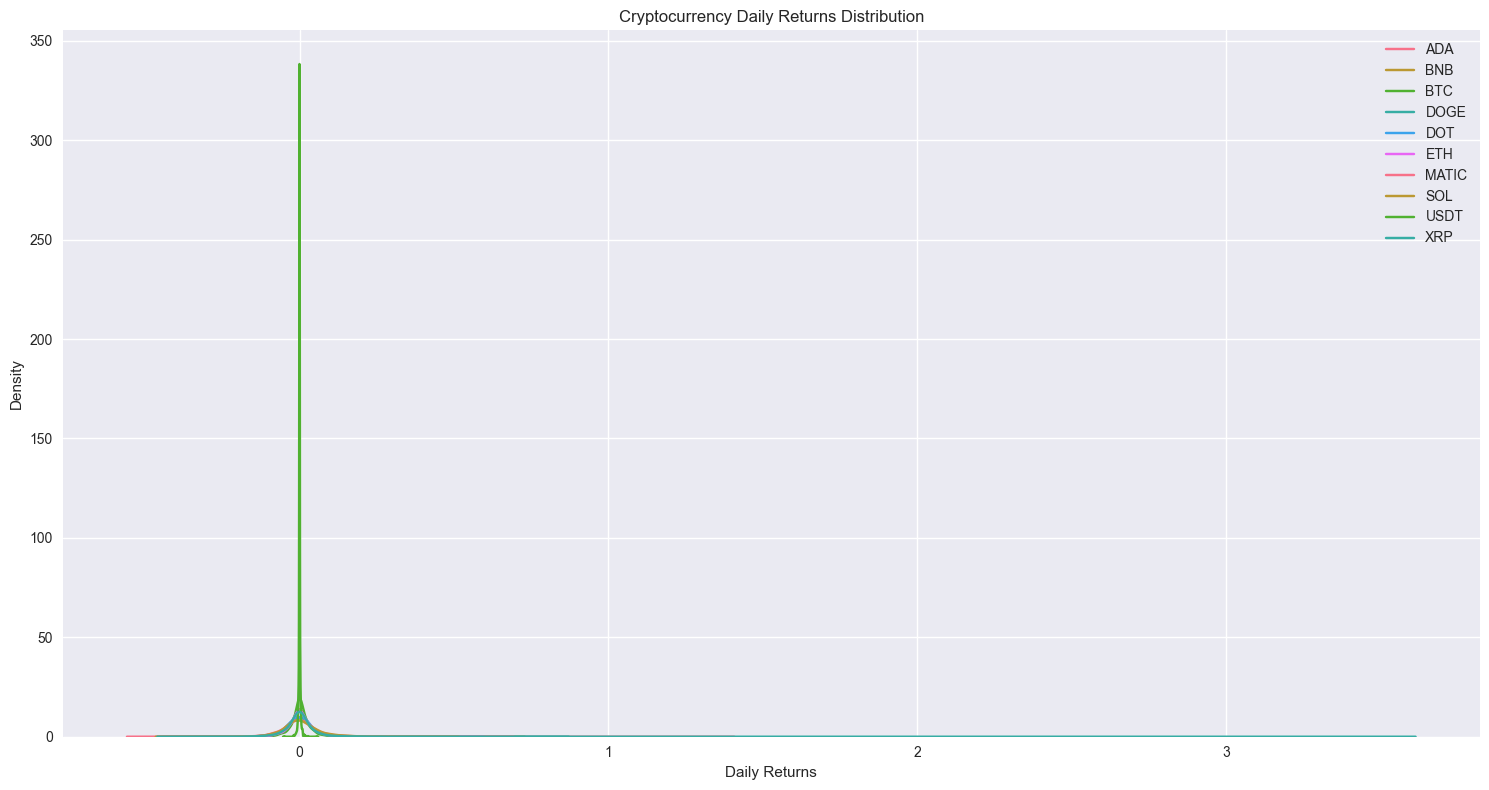

In [11]:
# 3. Daily Returns Distribution
def plot_returns_dist(data_dict, title_prefix):
    plt.figure(figsize=(15, 8))
    for symbol in data_dict:
        sns.kdeplot(data=data_dict[symbol]['Daily_Return'].dropna(), label=symbol)
    plt.title(f'{title_prefix} Daily Returns Distribution')
    plt.xlabel('Daily Returns')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot returns distribution for stocks and crypto
plot_returns_dist(stocks, 'Stock')
plot_returns_dist(crypto, 'Cryptocurrency')

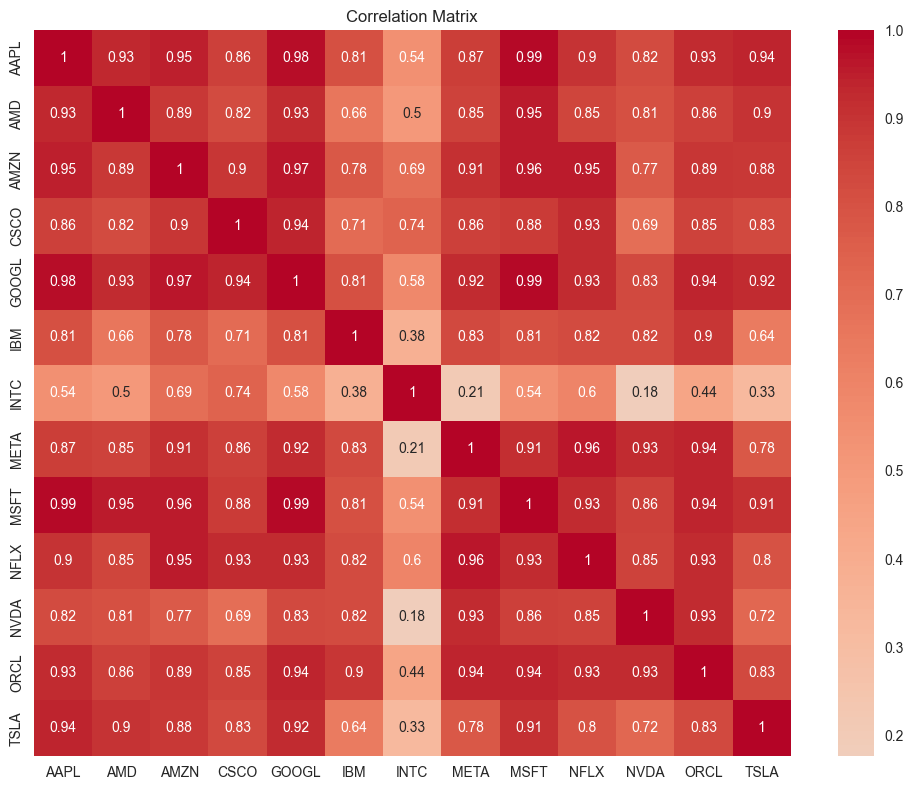

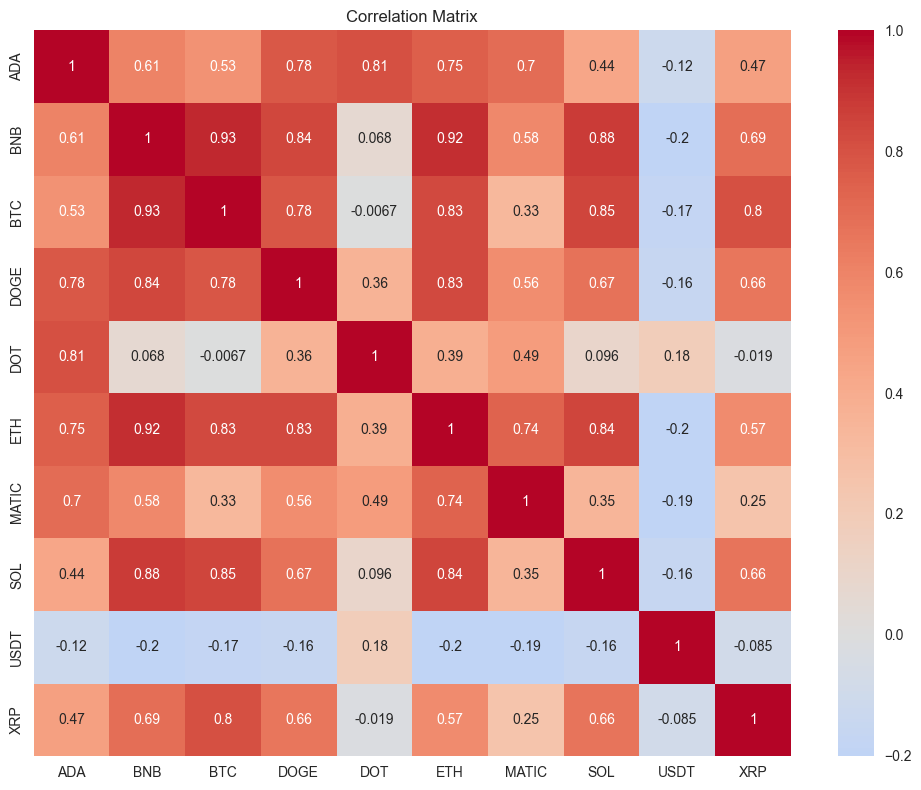

In [12]:
# 4. Correlation Analysis
def calculate_correlation(data_dict):
    # Create a dataframe with close prices for correlation
    close_prices = pd.DataFrame()
    for symbol in data_dict:
        close_prices[symbol] = data_dict[symbol]['Close']
    
    # Calculate correlation
    correlation = close_prices.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    return correlation

# Calculate and plot correlations
stock_corr = calculate_correlation(stocks)
crypto_corr = calculate_correlation(crypto)

In [13]:
# 5. Summary Statistics
def print_summary_stats(data_dict):
    for symbol in data_dict:
        print(f"\nSummary Statistics for {symbol}:")
        print(data_dict[symbol].describe())
        
print("\nStock Summary Statistics:")
print_summary_stats(stocks)
print("\nCrypto Summary Statistics:")
print_summary_stats(crypto)


Stock Summary Statistics:

Summary Statistics for AAPL:
             Close         High          Low  Daily_Return   Volatility  \
count  6468.000000  6468.000000  6468.000000   6467.000000  6448.000000   
mean     46.041782    46.504982    45.533245      0.001187     0.021175   
std      65.965795    66.614463    65.240663      0.024364     0.011920   
min       0.196932     0.197983     0.190928     -0.518692     0.004558   
25%       2.094128     2.139759     2.060581     -0.009810     0.013625   
50%      15.397378    15.518092    15.259849      0.000942     0.018372   
75%      49.010344    49.456835    48.638941      0.012574     0.025617   
max     258.103729   259.179926   256.718662      0.153289     0.128855   

            SMA_20       SMA_50  
count  6449.000000  6419.000000  
mean     45.828137    45.512537  
std      65.585597    65.056291  
min       0.207447     0.214764  
25%       2.086338     2.115818  
50%      15.277387    15.261416  
75%      48.790593    47.7749

In [15]:
# Create folders for processed data
processed_path = 'data/processed'
processed_stocks_path = os.path.join(processed_path, 'stocks')
processed_crypto_path = os.path.join(processed_path, 'crypto')

# Create directories if they don't exist
os.makedirs(processed_stocks_path, exist_ok=True)
os.makedirs(processed_crypto_path, exist_ok=True)

# Save processed stock data
for symbol in stocks:
    stocks[symbol].to_csv(os.path.join(processed_stocks_path, f'{symbol}_processed.csv'))

# Save processed crypto data
for symbol in crypto:
    crypto[symbol].to_csv(os.path.join(processed_crypto_path, f'{symbol}_processed.csv'))